In [ ]:
pip install feature_engine


In [ ]:
#I will be using feature_enigine package for imputaion techniques

# Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Topics.   
* **CCA** 
* **Mean/Median imputation** 
* **Mode/most Frequent imputation** 
* **Arbitrary Number Imputation**




In [ ]:
titanic=pd.read_csv("../input/spaceship-titanic/train.csv")
# test=pd.read_csv("../input/spaceship-titanic/test.csv")

# Handling Mixed Varibles `

In [ ]:
titanic[["Cabin_deck","Cabin_no.","Cabin_side"]]=titanic["Cabin"].str.split("/",expand=True)
titanic.drop(columns=["Cabin"],inplace=True)

titanic[["firstname","last_name"]]=titanic["Name"].str.split(" ",expand=True)
titanic.drop(columns=["Name"],inplace=True)

titanic[["Passenger_group","Passennger_no._in_group"]]=titanic["PassengerId"].str.split("_",expand=True)
#dropinng passengerId as we have seperated the information in two column we dont need it..
titanic.drop(columns=["PassengerId"],inplace=True)
titanic.head()

# What is a Missing Value?
**values or data that is not stored (or not present) for some variable/s in the given dataset.**
[Source Link](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#:~:text=Many%20machine%20learning%20algorithms%20fail,values%20are%20not%20handled%20properly.)


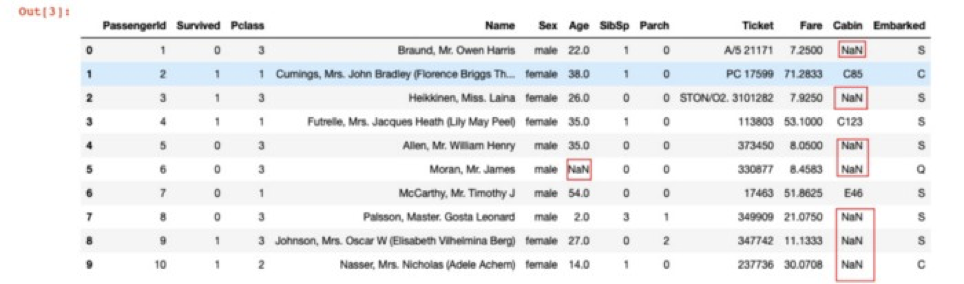
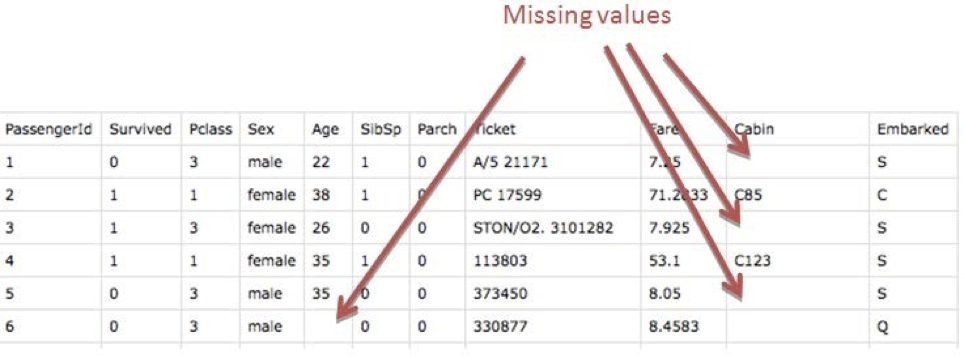

# Why Is Data Missing From The Dataset
**Some of the reasons are listed below:**
* Past data might get corrupted due to improper maintenance.
* Observations are not recorded for certain fields due to some reasons. There might be a failure in recording the values due to human error.
* The user has not provided the values intentionally.

# Types Of Missing Value
[Read this for more](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#:~:text=Many%20machine%20learning%20algorithms%20fail,values%20are%20not%20handled%20properly.)

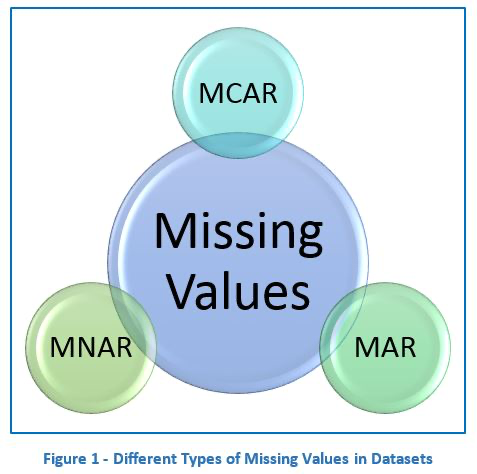

1) **MCAR:** If the missing values do not have any relation to the column it belongs to and with the rest of the columns in the dataset then it is called Missing Completely at Random.

**For example:** If we have a dataset of state elections with columns of religion, age, gender, and votes, where the votes column indicates a person’s vote for a particular political party. We found that the votes column had a few missing values which were not related to age, gender, or religion column and the votes column itself.

2) **MAR:** If the missing values do not have any relation to the column it belongs to but have a relation with any other columns in the dataset it is called Missing At Random

F**or example:** Consider the same election dataset. We identified that people from particular religions did not come to give their votes in other words, values in the votes column are missing when the religion column has ‘XYZ’ value. This means missing values in the votes column have a relation with values in the religion column. This is called Missing at Random

3) **MNAR:** If the missing values do have a relation to the column it belongs to but do not have a relation with any other columns in the dataset it is called Missing Not at Random.

**For example:** In the same election dataset. We noticed that votes for a specific party were not able to collect due to any unknown reason, and that’s why values are missing for that party in the votes column. Here the missing values in the votes column have a relation with the column itself. Hence, it is called Missing Not At Random.

Now, we will discuss techniques to handle missing values.

# Why Do We Need To Care About Handling Missing Value?
* Many machine learning algorithms fail if the dataset contains missing values. However, algorithms like K-nearest and Naive Bayes support data with missing values.
* You may end up building a biased machine learning model which will lead to incorrect results if the missing values are not handled properly.
* Missing data can lead to a lack of precision in the statistical analysis.

# Quantifying missing values

In [ ]:
titanic.isnull().sum()

In [ ]:
px.imshow(titanic.isnull().T,color_continuous_scale=px.colors.sequential.Blackbody)

#  1. Complete Case Analysis (CCA)
 * **also called list-wise deletion of cases**
 
 * **discarding those observations where the values in any of the variables are missing**


**When to use this technique?**

• This is used when missing data is less than 5% (remove rows) or greater than 80–90% (remove column)

• If the values are Missing Completely at Random (MCAR)

**Advantages:**

• Easy to use and implement as no complex logic is required.

• If a dataset is MCAR, then the distribution of columns after removing the rows will match the distribution of the original dataset.

• Here in the below diagram, after removing missing data the distribution of the new dataset which is in green color is almost similar to the distribution of the dataset with missing values in red color.

**Disadvantages:**

• It can exclude a large fraction of the original dataset

• Excluded observations could be informative for the analysis (if data is not missing at random)

• As there is no logic behind this technique, when we put our model on production, the model will not know how to handle new missing values

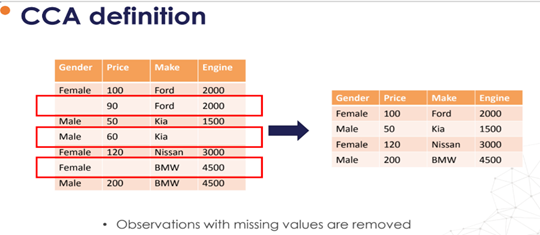

In [ ]:
train1=titanic.copy()

## Dropping missing values

In [ ]:
droped_train1=train1.dropna()

droped_train1.isnull().sum()

# this drops rows , but if axis=1 is given this will drop the columns

#this drop the rows or columns, in which if we have any missing values - parameter is how="any"

# but if we give how="all" this will drop only those rows or columns where all of the values are missing

# Note = we can also specify the columns from which we should consider missing value.
# Example -train1.dropna(subset=["HomePlanet"])

## Droping missing values from a subset

In [ ]:
droped_train1=train1.dropna(subset=["HomePlanet"])
droped_train1.isnull().sum()

#here only the rows where homePlanet values is missing is drop and not the other rows missing vallues 

# 2. Mean or Median Imputation
*  only be performed in numerical variables
* mean or median is calculated only from train set and we impute using these values on both train and test set,also future data


**When to use this technique?**

• *Only when values are missing completely at random*

• When the distribution of the data is normal then we should use mean

• When the distribution of the data is skewed then we should use median

• Only when missing data in the column is less than 5%

**Advantages:**

• Simple and easy to implement

• Easy to implement on the server also

**Disadvantages:**

• It may create extra outliers in the data

• It changes the correlation/covariance in the dataset

• It also changes the distribution of the dataset after imputing the missing values

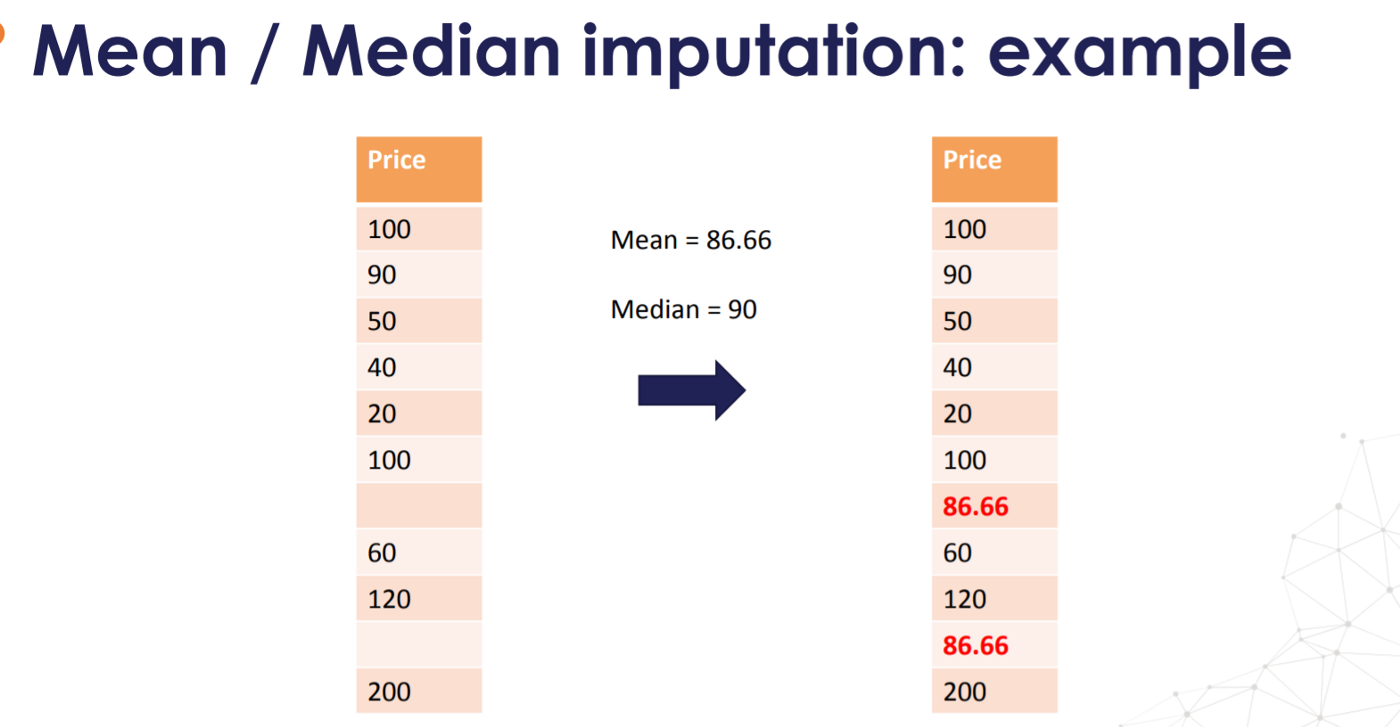!

In [ ]:
#importing our imputer class
from sklearn.model_selection import train_test_split

###  train_test split

In [ ]:
x_val,x_test,y_val,y_test=train_test_split(titanic.drop(columns="Transported"),titanic["Transported"],random_state=42,test_size=0.25)

In [ ]:
x_val.head()

#### missing values 

In [ ]:
x_val.isnull().sum()

In [ ]:
num_features=x_val.describe().columns.tolist()
num_features

In [ ]:
cat_features=[feature for feature in x_val.columns if feature not in num_features]
cat_features

## Normal Life

In [ ]:
x_val_copy=x_val.copy()
x_test_copy=x_test.copy()
for feature in num_features:
    value=x_val_copy[feature].median()
    x_val_copy[feature].fillna(value=value,inplace=True)
    x_test_copy[feature].fillna(value=value,inplace=True)
    
# Note how we calculate the median using the train set and then use this value to
# replace the missing data in the train and test sets.

x_test_copy.isnull().sum()

# all the numerical columns are filled no missing values(catergoical features still have missing values)

## Better Way

In [ ]:
#importing our imputer class
from feature_engine.imputation import MeanMedianImputer

#I am using feature_engine library 

In [ ]:
median_imputer = MeanMedianImputer(imputation_method="median",variables=["Age"])

# median is default method , we can "mean" if we want to impute with values with mean**
# Note -we dont have provide varibles parmeter if want to impute all the numerical becoz our imputer smart
# enough to identify  the numerical columns by itself 
# but if we want to imputer only certain columns we can pass only those columns in varibles

In [ ]:

x_val_copy=x_val.copy()
x_test_copy=x_test.copy()

In [ ]:
x_val["Age"].plot.kde(title="Age distibution");

In [ ]:
# fit our imputer on x_val_copy
median_imputer.fit(x_val_copy)

In [ ]:
median_imputer.imputer_dict_

# these are median values that our imputer has learned and stored in it

In [ ]:
# imputing the values
x_val_copy = median_imputer.transform(x_val_copy)

x_test_copy = median_imputer.transform(x_test_copy)

#check null values
x_test_copy.isnull().sum()

In [ ]:
x_val["Age"].plot.kde()
x_val_copy["Age"].plot.kde(title="Look how there is small change in our distribution");

In [ ]:
x_val["Age"].plot.box(title="before imputation")
plt.show()
x_val_copy["Age"].plot.box(title="Look how new outliers  in our distribution")
plt.show();

In [ ]:
print(x_val["Age"].var())
print(x_val_copy["Age"].var())

#change in the variance

# 3. Frequent category imputation(mode)
  *  we impute missing values using mostfrequent category in that column
  *  Frequent categories are estimated using the train set and then used to impute values in train, test,
and future datasets


**When to use this technique?**

• Only when data is Missing Completely At Random

• While filling the missing information with mode, the values used for filling them should be occurring the highest times in the dataset

• Only when missing data is less or equal to 5% in the dataset

**Advantages:**

• Easy and Simple to implement

• Can be handled with SimpleImputer sklearn with, strategy = most_frequent

**Disadvantage:**

• Changes the distribution of data

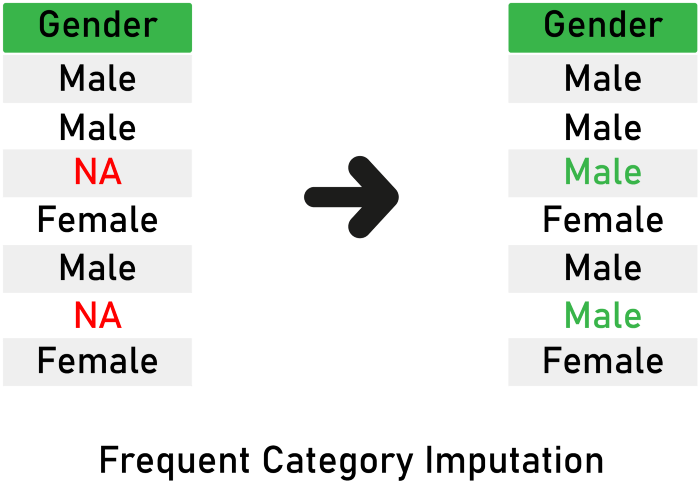!

### Normal way

In [ ]:
x_val_copy=x_val.copy()
x_test_copy=x_test.copy()

for feature in cat_features:
    value=x_val_copy[feature].mode()[0] # remember to use [0] because we can have multimodal data
    x_val_copy[feature].fillna(value=value,inplace=True)
    x_test_copy[feature].fillna(value=value,inplace=True)

x_test_copy.isnull().sum()    

### Better way

In [ ]:
#importing our imputer class
from feature_engine.imputation import CategoricalImputer

In [ ]:
cat_features

In [ ]:
mode_imputer= CategoricalImputer(imputation_method="frequent",
variables=[
'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Cabin_deck',
 'Cabin_no.',
 'Cabin_side',
 'firstname',
 'Passennger_no._in_group'])

# note We dont we have to give list in varibles if we want to impute all the columns (As in case above )
# varibles =[] only to select some specific coulmns

In [ ]:
x_val_copy=x_val.copy()
x_test_copy=x_test.copy()

In [ ]:
#fit the imputer
mode_imputer.fit(x_val_copy)

In [ ]:
mode_imputer.imputer_dict_
# all frequent categories in that column

In [ ]:
# imputing with mode value
x_val_copy=mode_imputer.transform(x_val_copy)
x_test_copy=mode_imputer.transform(x_test_copy)

# check the null values
x_test_copy.isnull().sum()

In [ ]:
# our last_name and passenger_group  has multi mode values so cant pass them in our imputer

x_val_copy["last_name"].value_counts()

# 4. Arbitrary NumberImputaion
* replacing missing values with an arbitrary value
* we need to be careful not toselect a value close to the mean or the median, or any other common value of the distribution
* distorts the
original variable distribution.


**When to use this technique?**

• Only when data is Not Missing At Random

**Advantage:**

• Simple and easy to implement

**Disadvantages:**

• It also changes the distribution of the dataset after imputing the missing values

• It changes the correlation/covariance in the dataset

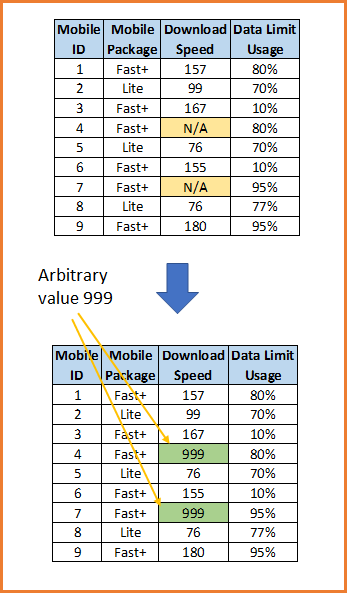!

In [ ]:
x_val[num_features].max()



### Normal way

In [ ]:
x_val_copy=x_val.copy()
x_test_copy=x_test.copy()
x_val_copy["Age"].fillna(value=52,inplace=True)
x_test_copy["Age"].fillna(value=52,inplace=True)
for feature in num_features:
    value=20000
    x_val_copy[feature].fillna(value=value,inplace=True)
    x_test_copy[feature].fillna(value=value,inplace=True)

x_test_copy.isnull().sum()    

### Better way

In [ ]:
#importing our imputer class
from feature_engine.imputation import ArbitraryNumberImputer

In [ ]:
# passing only the age varible
arb_imputer1=ArbitraryNumberImputer(arbitrary_number=52,variables="Age")

# here not passing any varible because our imputer will detect automatically numerical columns
arb_imputer2=ArbitraryNumberImputer(arbitrary_number=20000)

In [ ]:
#making copy of dataset
x_val_copy=x_val.copy()
x_test_copy=x_test.copy()


In [ ]:
# learning from validation data
arb_imputer1.fit(x_val_copy)

In [ ]:
# imputing the values
arb_imputer1.transform(x_val_copy)
arb_imputer1.transform(x_test_copy)

#check null values
x_test_copy.isnull().sum()


#here we only imputed the age columns values 

In [ ]:
# learning from validation data
arb_imputer2.fit(x_val_copy)

In [ ]:
# imputing the values
arb_imputer2.transform(x_val_copy)
arb_imputer2.transform(x_test_copy)

#check null values
x_test_copy.isnull().sum()


#here we are apply our imputer on every numerical column but as we have already filled our Age column
# this imputer will not fill any values in it
# remember if use this imputer first our age varible will also be filled with value 20000  

# Creating a sklearn Pipeline

In [ ]:
from sklearn.pipeline import  Pipeline

In [ ]:
my_pipeline=Pipeline(steps=[
    ("median_imput",median_imputer),
    ("mode_imput",mode_imputer)
])

In [ ]:
from sklearn import set_config

set_config(display="diagram")
my_pipeline

In [ ]:
x_val_copy=x_val.copy()
x_test_copy=x_test.copy()

In [ ]:
my_pipeline.fit(x_val_copy)

In [ ]:
x_val_copy=my_pipeline.transform(x_val_copy)
x_test_copy=my_pipeline.transform(x_test_copy)


In [ ]:
x_test_copy.isnull().sum()
    
# last name is still missing becoz we have not inculded that in our imputer    
# see above in pipeline in the categorical imputer



In [ ]:
#  I wil be upating on more techniques 
# upvote if  you like the notebook`
